In [1]:
import numpy as np # for algebric compute
import pandas as pd # for dataset manipulations
import matplotlib.pyplot as plt # plot
import seaborn as sns # plot
import prince
import sklearn.preprocessing as skpre

In [2]:
# Transform fetch original age column which is numeric
d_url =  'dataset/shootings.csv'
shooting_df_age = pd.read_csv(d_url)['age']
scale = skpre.StandardScaler().fit(shooting_df_age.array.reshape(-1, 1))
shooting_df_age = scale.transform(shooting_df_age.array.reshape(-1, 1))
print(shooting_df_age.sum()/shooting_df_age.size)

1.9741330350025256e-16


In [3]:
d_url =  'dataset/preprocessed-shootings.csv'
shooting_df_cleaned = pd.read_csv(d_url)
shooting_df_cleaned.age = shooting_df_age
shooting_df_cleaned.head()

,manner_of_death,age,gender,race,region,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,shot,1.296004,M,Asian,Pacific,Yes,attack,Not fleeing,No,Guns
1,shot,0.823305,M,White,Pacific,No,attack,Not fleeing,No,Guns
2,shot and Tasered,-1.067493,M,Hispanic,West North Central,No,other,Not fleeing,No,Unarmed
3,shot,-0.358444,M,White,Pacific,Yes,attack,Not fleeing,No,Other unusual objects
4,shot,0.193039,M,Hispanic,Mountain,No,attack,Not fleeing,No,Other weapon objects


In [4]:
famd = prince.FAMD(
    n_components=10,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='auto'
)
famd = famd.fit(shooting_df_cleaned)
famd.row_coordinates(shooting_df_cleaned)

,0,1,2,3,4,5,6,7,8,9
0,1.409408,0.570111,-0.558744,-0.756580,-0.292834,0.365955,0.092134,-1.264439,0.251040,0.844229
1,0.949213,-0.314214,-0.097585,-0.461140,-0.350838,0.266920,-0.163641,-0.391941,-0.043697,0.386434
2,-1.258416,1.473916,0.215891,0.021696,0.616795,0.846983,-0.480348,1.210980,0.627515,1.076369
3,-0.074854,0.647348,-0.946673,0.162746,-1.151965,-0.351286,-0.112386,-1.181241,0.851208,0.009498
4,0.104122,0.090587,0.241266,-1.297269,-0.515937,0.498047,0.098525,0.664002,0.784879,-0.618767
...,...,...,...,...,...,...,...,...,...,...
4890,-1.072966,-0.336635,-0.549523,-0.374499,1.479234,-0.331654,1.244801,0.519065,1.101580,-0.258686
4891,-1.246684,-1.034545,-0.103138,0.437899,0.308519,0.247550,-0.050424,0.042855,-0.291085,-0.340441
4892,-0.847193,0.693018,0.190732,1.645872,-0.586147,0.156934,0.760710,0.386019,-1.025976,2.064429
4893,-1.066685,-0.174529,0.271797,0.312939,-0.288794,-0.450914,-0.751229,0.925073,-0.276100,1.003814


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


inertia : [0.11731936 0.05861637 0.04842041]


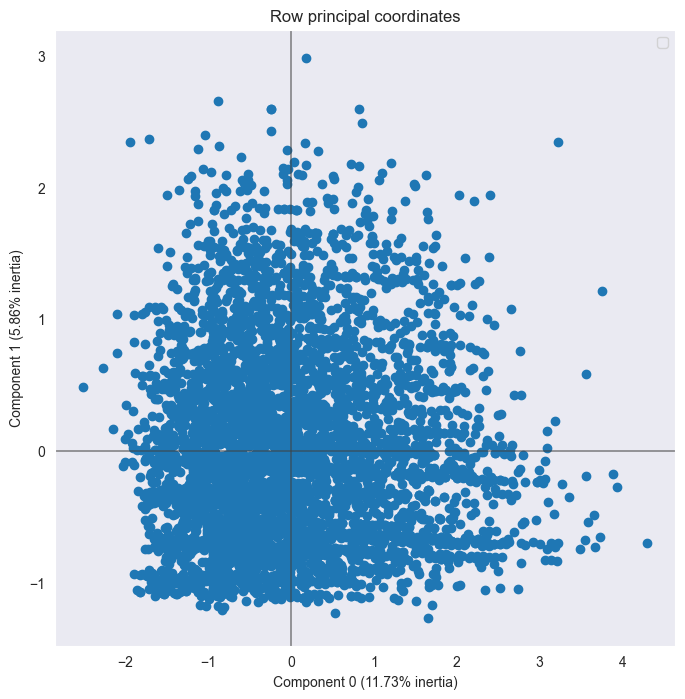

In [9]:
# plot coordinate
ax = famd.plot_row_coordinates(
     shooting_df_cleaned,
     ax=None,
     figsize=(8, 8),
     x_component=0,
     y_component=1,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )
# print inertia
print('inertia :', famd.explained_inertia_)

In [6]:
#saving point cloud
famd.row_coordinates(shooting_df_cleaned).to_csv("dataset/preprocessed-famd-shootings.csv", index=False)

array([0.11731936, 0.05861637, 0.04842041])

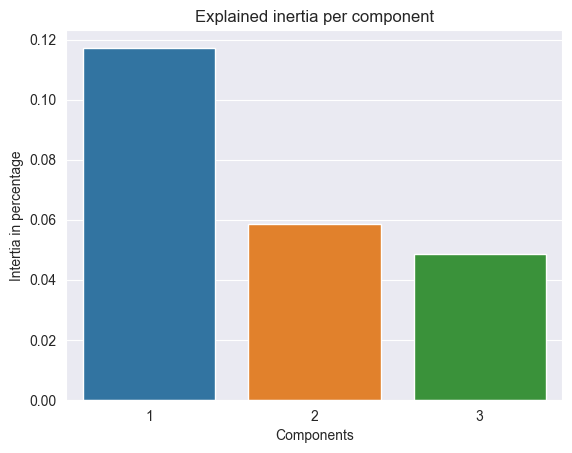

In [10]:
# bar plot of the inertia per dimension
plt.title('Explained inertia per component')
plt.xlabel('Components')
plt.ylabel('Intertia in percentage')
sns.barplot(x=[i for i in range(1,famd.explained_inertia_.size+1)], y=famd.explained_inertia_)
famd.explained_inertia_

The first component help us explain around 11% of the total variance. The second one is around 6%. In the interpretation part we will conclude on either this projection is good or not.

In [12]:
#generate multiple datasets
for i in range(2, 10):
    famd = prince.FAMD(
        n_components=i,
        n_iter=10,
        copy=True,
        check_input=True,
        engine='auto'
    )
    famd = famd.fit(shooting_df_cleaned)
    famd.row_coordinates(shooting_df_cleaned).to_csv("dataset/famd-" + str(i) + "-shootings.csv", index=False)